<a href="https://colab.research.google.com/github/Snupix031/Vid/blob/main/Untitled9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage import data, img_as_float
from skimage.util import random_noise
import skimage.io

import skimage.filters

from skimage.restoration import denoise_tv_chambolle, denoise_bilateral

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from scipy.io import loadmat

file_path = "drive/MyDrive/rit18_data.mat"

dataset = loadmat(file_path)

#Load Training Data and Labels
train_data = dataset['train_data']
train_mask = train_data[-1]
train_data = train_data[:6]
train_labels = dataset['train_labels']

#Load Validation Data and Labels
val_data = dataset['val_data']
val_mask = val_data[-1]
val_data = val_data[:6]
val_labels = dataset['val_labels']

#Load Test Data
test_data = dataset['test_data']
test_mask = test_data[1]
test_data = test_data[:6]

band_centers = dataset['band_centers'][0]
band_center_units = dataset['band_center_units']
classes = dataset['classes']                          

#Print some info about the dataset
print(dataset['sensor'][0])
print(dataset['info'][0])

Tetracam Micro-MCA
http://www.tetracam.com/Products-Micro_MCA.htm
Authors: Ronald Kemker, Carl Salvaggio, and Christopher Kanan
Organization: Carlson Center for Imaging Science, Rochester Institute of Technology
Website: http://www.cis.rit.edu/~rmk6217/
Paper: https://arxiv.org/abs/1703.01918


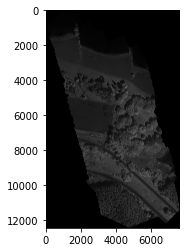

In [4]:
plt.imshow(test_data[5,:,:],'gray')


In [3]:
original = img_as_float(test_data[5,:,:])
#plt.imshow(original)
#print(original)
 

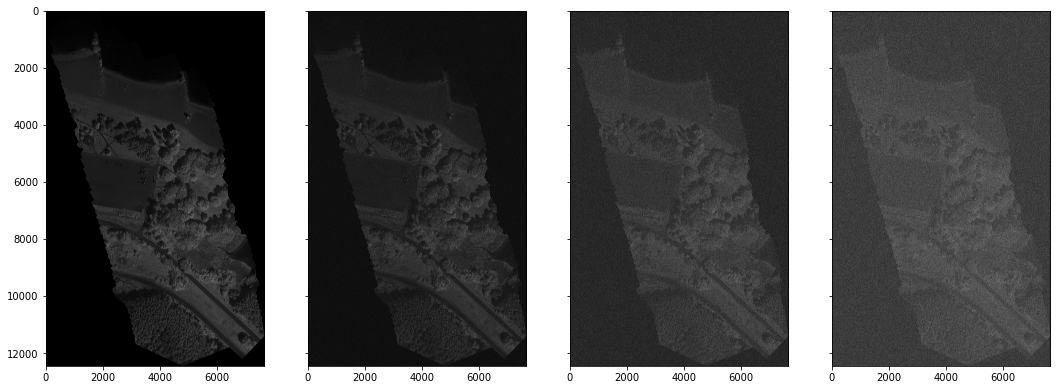

In [7]:
sigma = 0.155
noisy1 = random_noise(original, var=sigma**2)
noisy2 = random_noise(original, var=sigma**1)
noisy3 = random_noise(original, var=sigma**0.5)

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(18, 15), sharex=True, sharey=True)
ax[0].imshow(original,'gray')
ax[1].imshow(noisy1,'gray')
ax[2].imshow(noisy2,'gray')
ax[3].imshow(noisy3,'gray')

In [4]:
#Add Gaussian noise:
g_noised_image = random_noise(original, mode='gaussian')
#Add salt&pepper noise:
sp_noised_image = random_noise(original, mode='s&p', amount=0.09)
#Add Poisson noise:
poisson_noised_image =random_noise(original, mode='poisson')

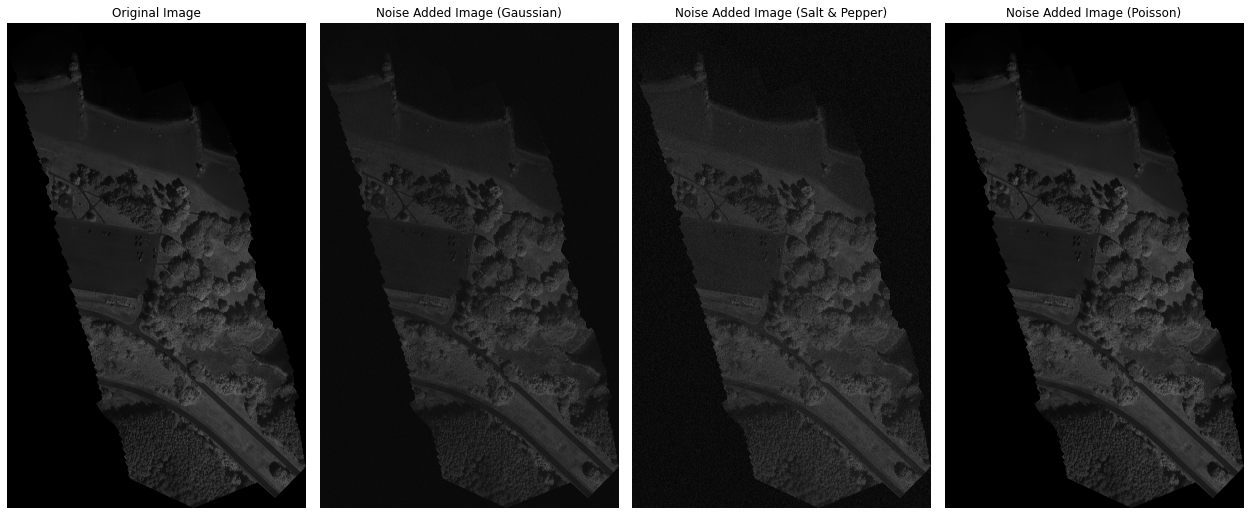

In [4]:


#Plot all noised images with the original image:
fig, ax = plt.subplots(nrows=1,ncols=4, figsize=(18, 15), sharex=True, sharey=True, squeeze=True)
ax = ax.ravel()
ax[0].imshow(original,'gray')
ax[0].set_title('Original Image')
ax[1].imshow(g_noised_image,'gray')
ax[1].set_title('Noise Added Image (Gaussian)')
ax[2].imshow(sp_noised_image,'gray')
ax[2].set_title('Noise Added Image (Salt & Pepper)')
ax[3].imshow(poisson_noised_image,'gray')
ax[3].set_title('Noise Added Image (Poisson)')
fig.tight_layout()
for a in ax:
    a.axis('off')

In [ ]:
#Remove random noise by using Total Variation:
denoised_image_tv = denoise_tv_chambolle(g_noised_image, multichannel=False)
#Remove random noise by using Bilateral:
denoised_image_bilateral = denoise_bilateral(g_noised_image, multichannel=False)

<ipython-input-5-4ad04021d457>:2: FutureWarning: `multichannel` is a deprecated argument name for `denoise_tv_chambolle`. It will be removed in version 1.0. Please use `channel_axis` instead.
  denoised_image_tv = denoise_tv_chambolle(g_noised_image, multichannel=False)


In [7]:

#Plot original, noised, and denoised images:
fig, ax = plt.subplots(1,4, figsize=(18, 15), sharey=True)
ax = ax.ravel()
ax[0].imshow(original,'gray')
ax[0].set_title('Original Image')
ax[1].imshow(g_noised_image,'gray')
ax[1].set_title('Noise Added Image (Gaussian)')
ax[2].imshow(denoised_image_tv,'gray')
ax[2].set_title('Denoised Image (TV chambolle)')
ax[3].imshow(denoised_image_bilateral,'gray')
ax[3].set_title('Denoised Image (Bilateral)')
fig.tight_layout()
for a in ax:
    a.axis('off')

<ipython-input-7-412b228ddeb2>:2: FutureWarning: `multichannel` is a deprecated argument name for `denoise_tv_chambolle`. It will be removed in version 1.0. Please use `channel_axis` instead.
  denoised_image_tv = denoise_tv_chambolle(g_noised_image, multichannel=True)
<ipython-input-7-412b228ddeb2>:4: FutureWarning: `multichannel` is a deprecated argument name for `denoise_bilateral`. It will be removed in version 1.0. Please use `channel_axis` instead.
  denoised_image_bilateral = denoise_bilateral(g_noised_image, multichannel=True)


ValueError: ignored

In [16]:
image = np.asarray(test_data[3,:,:], np.float64)
image = image.astype(np.uint8)



In [20]:
gauss_noise=np.zeros((12446,7654),dtype=np.uint8)
cv2.randn(gauss_noise,128,20)
gauss_noise=(gauss_noise*0.5).astype(np.uint8)

In [21]:
gn_img=cv2.add(image,gauss_noise)

Text(0.5, 1.0, 'Combined')

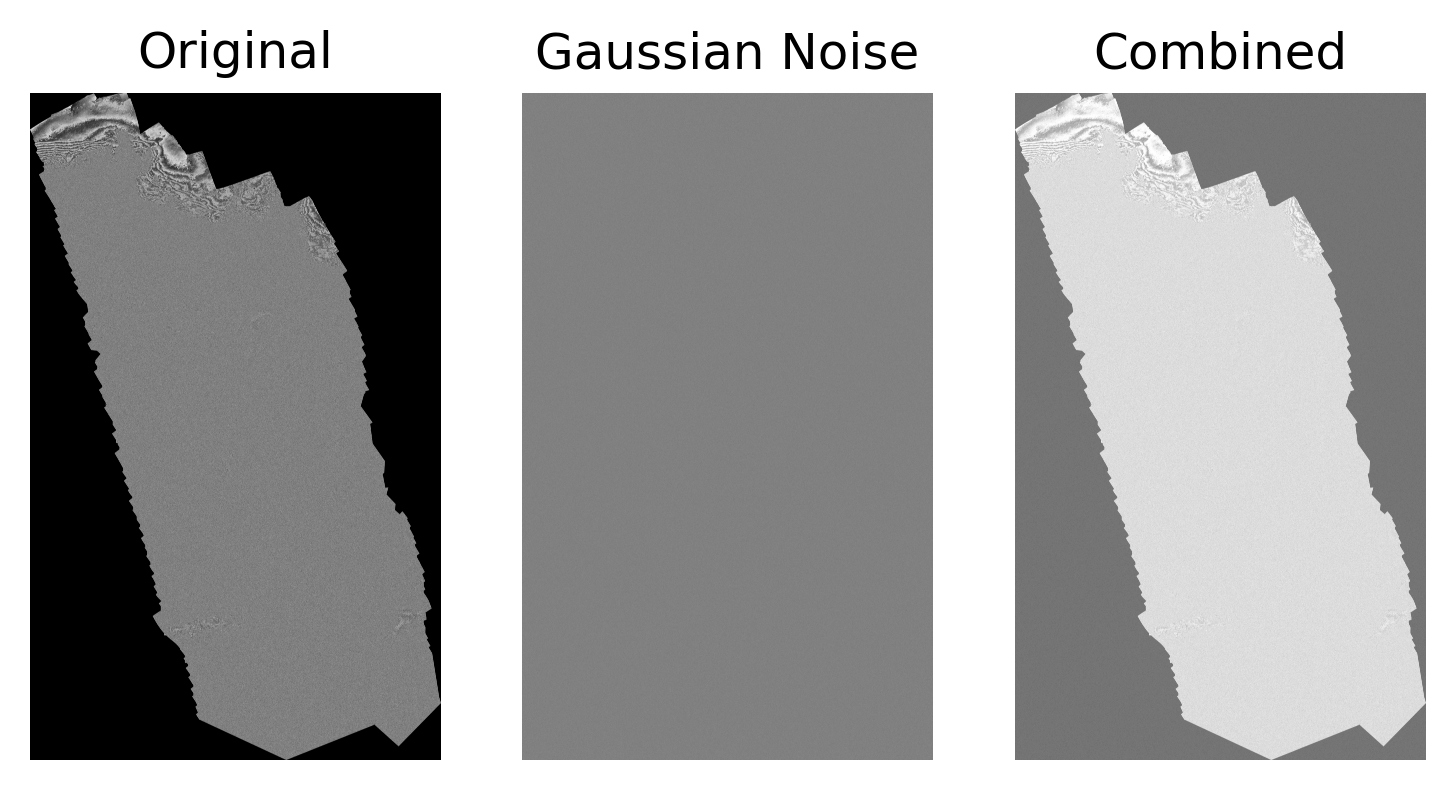

In [22]:
fig=plt.figure(dpi=300)

fig.add_subplot(1,3,1)
plt.imshow(image,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(gauss_noise,cmap='gray')
plt.axis("off")
plt.title("Gaussian Noise")

fig.add_subplot(1,3,3)
plt.imshow(gn_img,cmap='gray')
plt.axis("off")
plt.title("Combined")

In [16]:
imp_noise=np.zeros((12446,7654),dtype=np.uint8)
cv2.randu(imp_noise,0,255)
imp_noise=cv2.threshold(imp_noise,245,255,cv2.THRESH_BINARY)[1]


In [17]:
in_img=cv2.add(image,imp_noise)

Text(0.5, 1.0, 'Combined')

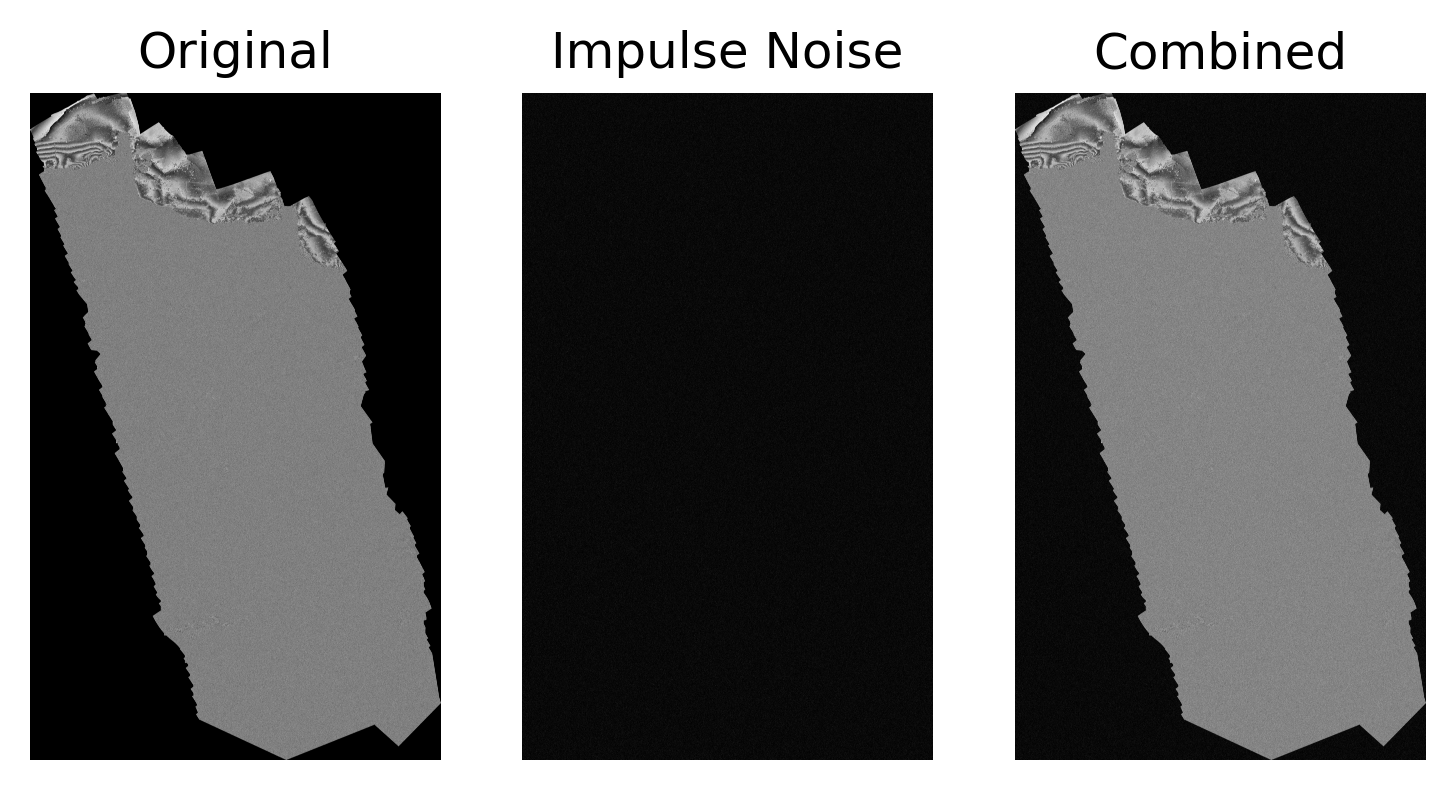

In [18]:
fig=plt.figure(dpi=300)

fig.add_subplot(1,3,1)
plt.imshow(image,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(imp_noise,cmap='gray')
plt.axis("off")
plt.title("Impulse Noise")

fig.add_subplot(1,3,3)
plt.imshow(in_img,cmap='gray')
plt.axis("off")
plt.title("Combined")

In [ ]:
blurred1=cv2.medianBlur(gn_img,3)

blurred3=cv2.medianBlur(in_img,3)

Text(0.5, 1.0, 'Median Filter')

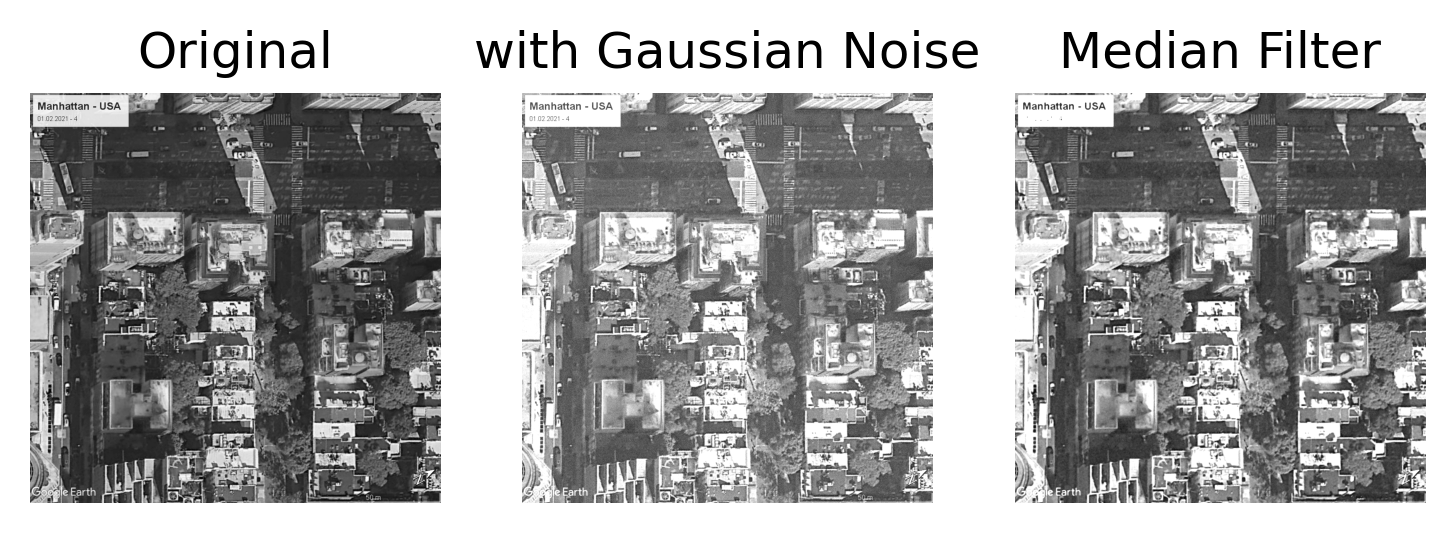

In [ ]:
fig=plt.figure(dpi=300)
fig.add_subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(gn_img,cmap='gray')
plt.axis("off")
plt.title("with Gaussian Noise")

fig.add_subplot(1,3,3)
plt.imshow(blurred1,cmap='gray')
plt.axis("off")
plt.title("Median Filter")

Text(0.5, 1.0, 'Median Filter')

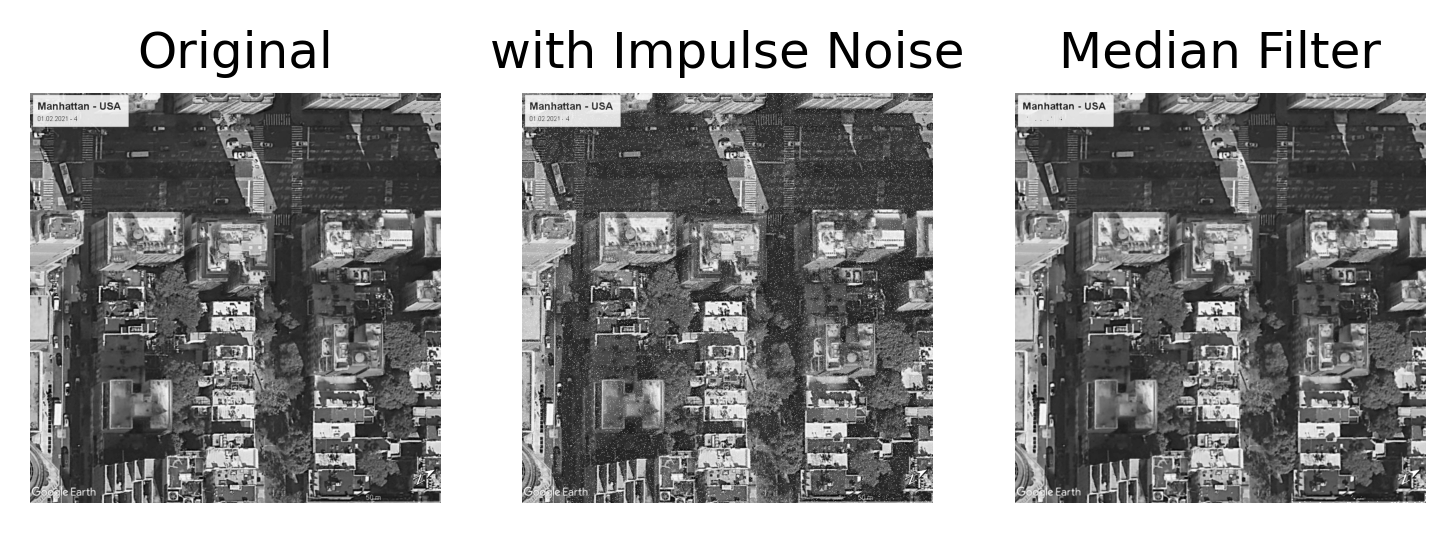

In [ ]:
fig=plt.figure(dpi=300)
fig.add_subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(in_img,cmap='gray')
plt.axis("off")
plt.title("with Impulse Noise")

fig.add_subplot(1,3,3)
plt.imshow(blurred3,cmap='gray')
plt.axis("off")
plt.title("Median Filter")

In [ ]:
blurred21=cv2.GaussianBlur(gn_img,(3,3),0)

blurred23=cv2.GaussianBlur(in_img,(3,3),0)

Text(0.5, 1.0, 'Gaussian Filter')

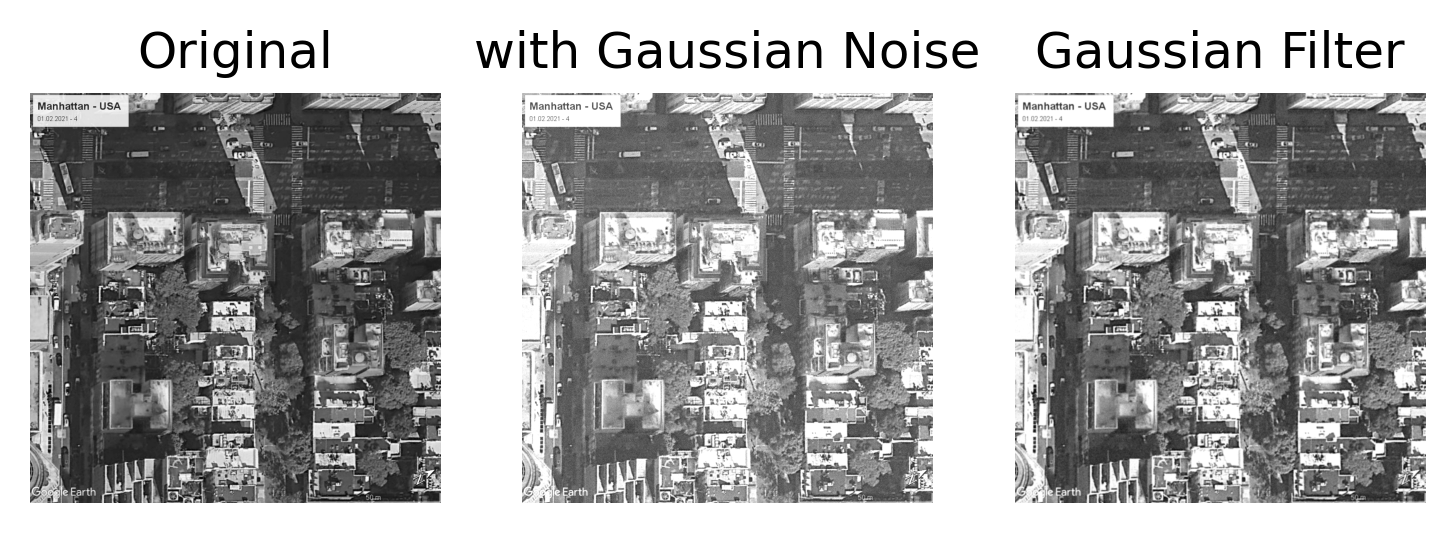

In [ ]:
fig=plt.figure(dpi=300)
fig.add_subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(gn_img,cmap='gray')
plt.axis("off")
plt.title("with Gaussian Noise")

fig.add_subplot(1,3,3)
plt.imshow(blurred21,cmap='gray')
plt.axis("off")
plt.title("Gaussian Filter")

Text(0.5, 1.0, 'Gaussian Filter')

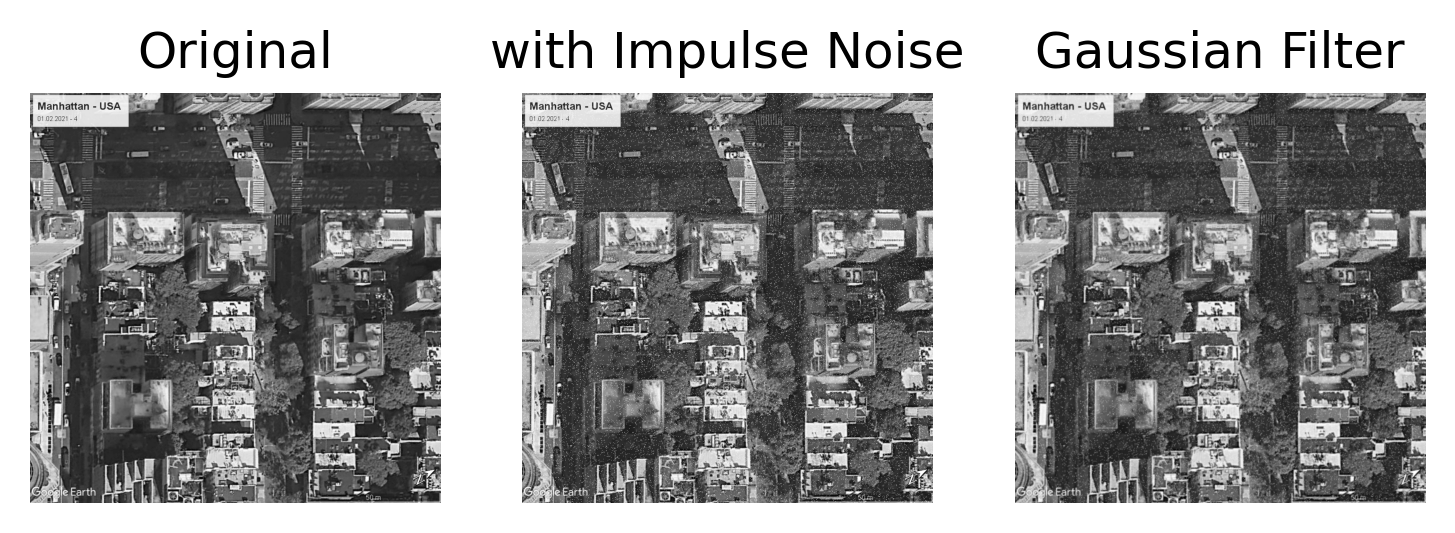

In [ ]:
fig=plt.figure(dpi=300)
fig.add_subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(in_img,cmap='gray')
plt.axis("off")
plt.title("with Impulse Noise")

fig.add_subplot(1,3,3)
plt.imshow(blurred23,cmap='gray')
plt.axis("off")
plt.title("Gaussian Filter")

In [ ]:
## NSR 
import numpy as np

image = np.array(img) ## input orignal image
mean_image = np.mean(image)

noisy_image = np.array(blurred23) ## input noisy image
noise = noisy_image - image
mean_noise = np.mean(noise)
noise_diff = noise - mean_noise
var_noise = np.sum(np.mean(noise_diff**2)) ## variance of noise

if var_noise == 0:
      snr = 100 ## clean image
else:
      snr = (np.log10(mean_image/var_noise))*20 ## SNR of the image
      
snr

-41.80789643717745